# Neural Encoding I: Firing Rates and Spike Statistics

## Book Content

### Spikes

We start with a **mathematical abstraction of action potentials**, called spikes.

Spikes in time are discribed by the dirac delta function: $\delta(t-t_{spike})$

A spike train with n spikes {1,2,...,n} is represented by: $\rho(t) = \sum_{i=1}^{n}\delta(t-t_{i})$

Assumption of this abstraction:
   1. Action potential last for a very short amount of time (infinitely small amount of time in the case of dirac delta)
   2. Action potentials produced by a neuron are identical

### Firing Rate

We now introduce the concept of firing "rate", which measures **spikes per unit time**. Note that because spikes are discrete events, we can only estimate firing rate up to a ceratin degree. 

The idea is that neurons represent their input through changes in output, and this is case **firing rate is a potential charactertic of a neuron's output**.

We can approximate firing rate using a window of size Δt: $r(t) = \frac{1}{\Delta t} \int_{t}^{t+\Delta t}\rho(\tau)d\tau$

Alternatively, we can use a causal or non-causal kernel w(t) to produce a smoother approximation: $r(t) = \int_{-\infty}^{\infty}\omega(\tau)\rho(t-\tau)d\tau$

### Tuning Curve

There are many ways to measure the input-output relationships in a neuron. If we assume some pathway transforms sensory information into an input of this neuron, we can use **average firing rate as a measure of output and some characteristic of the stimulus as a measure of the input** (example: bar orientation for visual stimuli). Here, two important operations are performed:
1. Averaging of firing across the entire trial duration, this takes away any temporal variability after stimulus presentation
2. Varying only one variable in the input. The actual scenario is that the response depends on many different features of input (some of which are correlated).

After measuring, we can fit a function **f(s) that describes firing rate as a function of stimulus**: $f(s) = r_0 + (r_{max} - r_0)g(s)$, where $r_0$ is the base firing rate, and $r_{max}$ is the maximum firing rate. This is the tuning curve.

### Spike-Triggered Average

A different way to characterize input is stimulus intensity as a function of time. This way, we can characterize a neuron's response not just to absolute intensity but changes in intensity. We make another two imporant assumpations about the time varying stimulus:
1. zero-mean: $\frac{1}{T}\int_{0}^{T}s(t)dt = 0$
2. Periodicity with period = $\tau$ (identity across all trials with $T=\tau$): $\int_{0}^{T}h(s(t+\tau))dt = \int_{0}^{T}h(s(t))dt$

We limit our consideration of output to single spikes. We measure the stimulus of an interval before a spike, and average them. In this framing, the input-output relationship is **what temporal pattern of stimulus is most likely to produce a spike**. This does include more information about the stimulus; however, it takes away any firing rate information, as all spikes are treated equally.

We now define the spike triggered average $C(\tau)$ as a function of the **trial-averaged stimulus $\tau$ seconds before a spike**:
$$
C(\tau) = \langle \frac{1}{n}\sum_{i=1}^{n}s(t_i-\tau) \rangle = \frac{1}{\langle n\rangle} \int_{0}^{T} r(t)s(t-\tau)dt = \frac{1}{\langle n\rangle} (s * r)
$$
This simplification is possible because if we're summing over time shifted versions of the stimulus based on spike times (in multiple trials), it is equivalent to convolving it with the averaged spike train.

### Aside: White Noise

Sometimes its useful to generate white noise stimuli, that is, stimuli that **isn't correlated with itself from one moment to the next**. Ideal white noise has the following properties:
1. Perfectly unpredictable
2. Has equal power at all frequencies
3. Has ACF = 0 for all values except t = 0
4. 0 mean

Mathematically defined, the autocorrelation function (ACF) is the cross-correlation of a signal with itself:  $Q_{ss}(t) = s(t) * s(-t)$ This multiplies the signal with a time shifted version of itself and the sums the product.

For an ideal white noise, $Q_{ss}(t) = \sigma_{s}^2\delta(t)$, i.e. zero everywhere except t = 0

In digital systems, we can only approximate this up to a certain degree.

In [45]:
import numpy as np
from matplotlib import pyplot as plt

In [50]:
noise = np.random.normal(size = 1000)
#noise = np.random.uniform(size = 1000, low = -1, high=1)

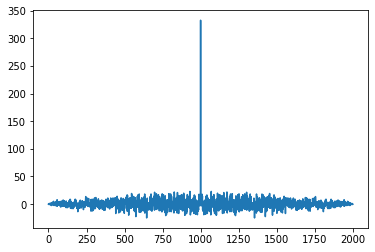

In [56]:
plt.plot(np.correlate(noise, noise, mode='full'))

We can see the ACF rapidly approaching zero as we get farther away from t = 0. This is because for gaussian distributed white noise with zero mean (generated indenpendly at each timepoint), the cross-correlation is much more likely to be zero (since values above and below the mean cancel each other out). 

A curious observation: we seem to get same ACF for noise generated with a uniform distribution, what is the difference?

## Exercises